In [1]:

%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from __future__ import division

pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams['font.family'] = 'sans-serif'

# This is necessary to show lots of columns in pandas 0.12. 
# Not necessary in pandas 0.13.
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

c:\python27\lib\site-packages\IPython\core\interactiveshell.py:2885: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
pipe = pd.read_csv('C:/Python27/output_improved_AMS.csv')[['Listing ID','Sentiment score','Sentence','Review ID',  'Feature: Accuracy','Feature: Check-in','Feature: Cleanliness', 'Feature: Communication','Feature: Location','Feature: Value']]

## Total number of sentences
There are overall **302 081** sentences.


In [3]:
nr_sentences=pipe['Listing ID'].count()
nr_sentences

302081

## Total number of reviews
And **59 150** reviews

In [4]:
nr=pipe[['Listing ID','Review ID']].groupby('Review ID')
dfr=nr.count()
nr_reviews=len(dfr.axes[0])
nr_reviews

59150

## Total number of listings
And **2 356** listings which belong to Amsterdam. In the database there are listings of NL and UK. Amsterdam is just a part of them, which I chose for analysis.

In [5]:
ten=pipe.groupby('Listing ID')
total=ten['Review ID'].mean().count()
total


2356

## Average number of reviews per listing 
A listing can have in average **25.1** reviews

In [6]:

nr_reviews/total

25.106112054329373

## Average number of sentences per review
And a review has in average **5.1** sentences.

In [7]:

nr_sentences/nr_reviews

5.1070329670329668

## Average number of sentences per listing
A listings will have in this way an average of **128.2** sentences 

In [8]:
nr_sentences/total

128.21774193548387

## Features mentioned in sentence level
The table below shows the frequencies of features measured in sentence level, so "How many sentences mention that feature?" This values are also shown by peercentage in comparison with the total number of sentences. This table is visualized in the bar graph, from which we can clearly see that **location** is the most mentioned feature and **check in** the least one. The percentages however are very small in general since the corpus of reviews is very big.

In [9]:
f1= pipe[pipe['Feature: Accuracy']!=0]
f11=f1['Feature: Accuracy'].count()

f2= pipe[pipe['Feature: Check-in']!=0]
f22=f2['Feature: Check-in'].count()


f3= pipe[pipe['Feature: Cleanliness']!=0]
f33=f3['Feature: Cleanliness'].count()

f4= pipe[pipe['Feature: Communication']!=0]
f44=f4['Feature: Communication'].count()

f5= pipe[pipe['Feature: Location']!=0]
f55=f5['Feature: Location'].count()

f6= pipe[pipe['Feature: Value']!=0]
f66=f6['Feature: Value'].count()

df1 = [{'Sentences' : f11, 'Percentage' : 
        (f11/nr_sentences).round(2)*100},
      { 'Sentences': f22, 'Percentage':
       (f22/nr_sentences).round(2)*100},
      { 'Sentences' : f33, 'Percentage':
       (f33/nr_sentences).round(2)*100},
      { 'Sentences' : f44, 'Percentage':
       (f44/nr_sentences).round(2)*100},
      { 'Sentences':f55, 'Percentage':
       (f55/nr_sentences).round(2)*100},
      {'Sentences': f66, 'Percentage':
       (f66/nr_sentences).round(2)*100}]
fin=pd.DataFrame(df1, index=['Accuracy',
'Check-in','Cleanliness','Communication','Location','Value'])
fin


,Percentage,Sentences
Accuracy,3.0,8364
Check-in,2.0,5818
Cleanliness,6.0,18440
Communication,6.0,16894
Location,23.0,69616
Value,7.0,19862


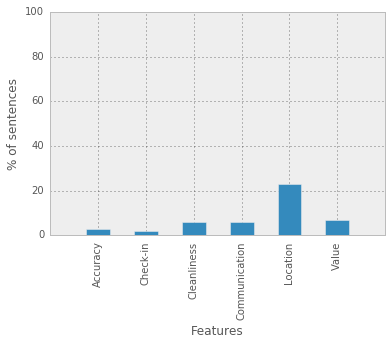

In [10]:
a=fin['Percentage'].plot(kind='bar',figsize=(6,4),y='Percentage')
plt.axis([-1,6,0,100])
a.set_ylabel("% of sentences")
a.set_xlabel("Features")
plt.show()


## Features mentioned in review level
The analysis above is done this time in review level, meaning "In how mamny reviews are the features mentioned?" Here we see the same trend but the results are better representative of the users opinions as explained in the results chapter.

In [11]:
# --------------------------------------------------------------
# MOST MENTIONED FEATURE IN REVIEW LEVEL
# --------------------------------------------------------------

pipe1=pipe[['Review ID','Feature: Accuracy','Feature: Check-in','Feature: Cleanliness','Feature: Communication', 'Feature: Location','Feature: Value']]
ac1=pipe1[pipe1['Feature: Accuracy']!=0].groupby('Review ID').mean()
ac=ac1['Feature: Accuracy'].count()

che1=pipe1[pipe1['Feature: Check-in']!=0].groupby('Review ID').mean()
che=che1['Feature: Check-in'].count()

cl1=pipe1[pipe1['Feature: Cleanliness']!=0].groupby('Review ID').mean()
cl=cl1['Feature: Cleanliness'].count()

co1=pipe1[pipe1['Feature: Communication']!=0].groupby('Review ID').mean()
co=co1['Feature: Communication'].count()

lo1=pipe1[pipe1['Feature: Location']!=0].groupby('Review ID').mean()
lo=lo1['Feature: Location'].count()

va1=pipe1[pipe1['Feature: Value']!=0].groupby('Review ID').mean()
va=va1['Feature: Value'].count()

df1 = [{'Reviews' : ac, 'Percentage' : (ac/nr_reviews).round(2)*100},
      { 'Reviews': che, 'Percentage':(che/nr_reviews).round(2)*100},
      { 'Reviews' : cl, 'Percentage':(cl/nr_reviews).round(2)*100},
      { 'Reviews' : co, 'Percentage':(co/nr_reviews).round(2)*100},
      { 'Reviews':lo, 'Percentage':(lo/nr_reviews).round(2)*100},
      {'Reviews': va, 'Percentage':(va/nr_reviews).round(2)*100}]
rev=pd.DataFrame(df1, index=['Accuracy', 'Check-in','Cleanliness',
                             'Communication','Location','Value'])
rev

,Percentage,Reviews
Accuracy,13.0,7915
Check-in,9.0,5454
Cleanliness,30.0,17757
Communication,25.0,14610
Location,75.0,44539
Value,32.0,18811


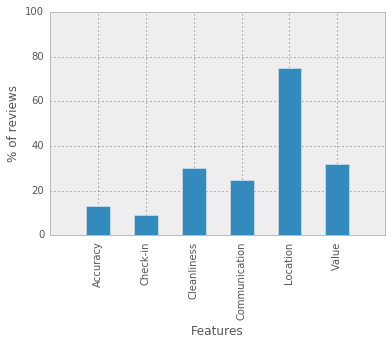

In [12]:
b=rev['Percentage'].plot(kind='bar',figsize=(6,4))
plt.axis([-1,6,0,100])
b.set_ylabel("% of reviews")
b.set_xlabel("Features")
plt.show()

## The compound sentiment of features per each listing
And sentiment of each feature is calculated, excluding sentences with no sentiment. The sentiment of a feature for a listing is the average sentiment for this feature of the reviews of that listing.

In [13]:
acc1=pipe[pipe['Feature: Accuracy']!=0].groupby('Review ID').mean()[['Listing ID','Feature: Accuracy']]
acc=acc1.groupby('Listing ID').mean()

chec1=pipe[pipe['Feature: Check-in']!=0].groupby('Review ID').mean()[['Listing ID','Feature: Check-in']]
chec=chec1.groupby('Listing ID').mean()

cle1=pipe[pipe['Feature: Cleanliness']!=0].groupby('Review ID').mean()[['Listing ID','Feature: Cleanliness']]
cle=cle1.groupby('Listing ID').mean()

com1=pipe[pipe['Feature: Communication']!=0].groupby('Review ID').mean()[['Listing ID','Feature: Communication']]
com=com1.groupby('Listing ID').mean()

loc1=pipe[pipe['Feature: Location']!=0].groupby('Review ID').mean()[['Listing ID','Feature: Location']]
loc=loc1.groupby('Listing ID').mean()

val1=pipe[pipe['Feature: Value']!=0].groupby('Review ID').mean()[['Listing ID','Feature: Value']]
val=val1.groupby('Listing ID').mean()

frames=[acc,chec,cle,com,loc,val]
result=pd.concat(frames,axis=1)

## Feature mentioned in listing level
The frequency of mentioning the features is measures in listing level, meaning that if a certain feature has a sentiment score for a listing, it is mentioned there at least once. The values are shown in the table and also plotted in the graph. However this is not a reliable measurement as it itakes only one sentence to say that this feature is commented in the listing, while for other listings may be 100 sentences over this feature. 

In [14]:
# --------------------------------------------------------------
# MOST MENTIONED FEATURE IN LISTING LEVEL
# --------------------------------------------------------------

a=total-result['Feature: Accuracy'].isnull().sum()
b=total-result['Feature: Check-in'].isnull().sum()
c=total-result['Feature: Cleanliness'].isnull().sum()
d=total-result['Feature: Communication'].isnull().sum()
e=total-result['Feature: Location'].isnull().sum()
f=total-result['Feature: Value'].isnull().sum()
#print 'Accuracy Check-in Cleanliness Communication Location Value'
#print a,b,c,d,e,f
df3 = [{'Listings' : a, 'Percentage' : (a/total).round(2)*100},
      { 'Listings': b, 'Percentage':(b/total).round(2)*100},
      { 'Listings' : c, 'Percentage':(c/total).round(2)*100},
      { 'Listings' : d, 'Percentage':(d/total).round(2)*100},
      { 'Listings':e, 'Percentage':(e/total).round(2)*100},
      {'Listings': f, 'Percentage':(f/total).round(2)*100}]
final=pd.DataFrame(df3, index=['Accuracy', 'Check-in','Cleanliness','Communication','Location','Value'])
final

,Listings,Percentage
Accuracy,1773,75.0
Check-in,1623,69.0
Cleanliness,2076,88.0
Communication,2067,88.0
Location,2331,99.0
Value,2145,91.0


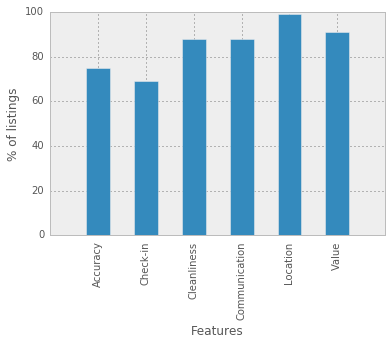

In [15]:
# Visualization of which feature is most mentioned in the listings

c=final['Percentage'].plot(kind='bar',figsize=(6,4),label='Listing level')
plt.axis([-1,6,0,100])
c.set_ylabel("% of listings")
c.set_xlabel("Features")
plt.show()

## Put together the number of sentences, reviews and listing where features are mentioned

In [16]:
frames=[fin['Sentences'],rev['Reviews'],final['Listings']]
pd.concat(frames,axis=1)

,Sentences,Reviews,Listings
Accuracy,8364,7915,1773
Check-in,5818,5454,1623
Cleanliness,18440,17757,2076
Communication,16894,14610,2067
Location,69616,44539,2331
Value,19862,18811,2145


## How features are mentioned in sentence level per each listing
Since we claimed that mentioning a feature's sentiment in listing level is not reliable, the table below shows (for 10 random listing) the numnber of sentences mentioning the feature **Accuracy**. We see that the maximum times mentioned is 20 and and the lowest is only 1. The table also shows the sentiment score of the features for the corresponding listing.

In [17]:
# ---------------------------------------------------------
# FEATURE ACCURACY MENTIONED IN SENTENCE LEVEL PER LISTING
# ---------------------------------------------------------

bo=pipe[pipe['Feature: Accuracy']!=0].groupby('Listing ID')['Feature: Accuracy']
boo=pipe.groupby('Listing ID')['Feature: Accuracy']
a = bo.count().rename("Sentences mentioned")
b = boo.count().rename("Sentences total")
acc1=pipe[pipe['Feature: Accuracy']!=0].groupby('Review ID').mean()[['Listing ID','Feature: Accuracy']]
acc=acc1.groupby('Listing ID').mean().round(2)
perc = (a/b).round(2).rename("Percentage")
rez = pd.concat([a,b,perc,acc],axis=1)
rez.columns=['Mentioned','Total','Percentage','Sentiment score']
rez[:10]

,Mentioned,Total,Percentage,Sentiment score
Listing ID,,,,
2818,13.0,749,0.02,0.39
20168,13.0,362,0.04,0.46
20818,NaN,23,NaN,NaN
23651,2.0,203,0.01,0.53
25488,9.0,289,0.03,0.54
25489,13.0,450,0.03,0.38
27886,1.0,120,0.01,0.31
102107,2.0,161,0.01,0.63
105074,20.0,505,0.04,0.40


The same analysis as above is done for feature **location**

In [18]:
# -------------------------------------------------------------------------------------
# FEATURE LOCATION MENTIONED IN SENTENCE LEVEL PER LISTING
# -------------------------------------------------------------------------------------

lbo=pipe[pipe['Feature: Location']!=0].groupby('Listing ID')['Feature: Location']
lboo=pipe.groupby('Listing ID')['Feature: Location']
la = lbo.count().rename("Sentences mentioned")
lb = lboo.count().rename("Sentences total")
lperc = (la/lb).round(2).rename("Percentage")
loc1=pipe[pipe['Feature: Location']!=0].groupby('Review ID').mean()[['Listing ID','Feature: Location']]
loc=loc1.groupby('Listing ID').mean().round(2)
rez_loc=pd.concat([la,lb,lperc,loc],axis=1)
rez_loc.columns=['Mentioned','Total', 'Percentage','Sentiment score']
rez_loc[:10]

,Mentioned,Total,Percentage,Sentiment score
Listing ID,,,,
2818,144.0,749,0.19,0.43
20168,80.0,362,0.22,0.50
20818,4.0,23,0.17,0.67
23651,35.0,203,0.17,0.55
25488,66.0,289,0.23,0.49
25489,71.0,450,0.16,0.60
27886,19.0,120,0.16,0.69
102107,41.0,161,0.25,0.57
105074,118.0,505,0.23,0.50


## Features mentioned in review level per each listing
The table below shows (for 5 random listing) the numnber of reviews mentioning the feature **Accuracy**. We see that the maximum times mentioned is 12 and and the lowest is 2. The table also shows the sentiment score of the features for the corresponding listing.

In [19]:
# -------------------------------------------------------------------------------------
# FEATURE ACCURACY MENTIONED IN REVIEW LEVEL PER LISTING
# -------------------------------------------------------------------------------------

aaa=pipe[pipe['Feature: Accuracy']!=0].groupby('Review ID').mean()
ac=aaa.groupby('Listing ID')
revac=ac['Feature: Accuracy'].count().rename("Reviews mentioned")
bbb=pipe.groupby('Review ID').mean()
ab=bbb.groupby('Listing ID')
revtot=ab['Feature: Accuracy'].count().rename("Reviews total")
acc1=pipe[pipe['Feature: Accuracy']!=0].groupby('Review ID').mean()[['Listing ID','Feature: Accuracy']]
acc=acc1.groupby('Listing ID').mean().round(2)
pe = (revac/revtot).round(2).rename("Percentage")
pea=pd.concat([revac,revtot,pe,acc],axis=1)
pea.columns=['Mentioned','Total','Percentage',
             'Sentiment score']
pea[:5]

,Mentioned,Total,Percentage,Sentiment score
Listing ID,,,,
2818,12.0,123,0.10,0.39
20168,12.0,77,0.16,0.46
20818,NaN,4,NaN,NaN
23651,2.0,36,0.06,0.53
25488,9.0,69,0.13,0.54


In [20]:
# -------------------------------------------------------------------------------------
# FEATURE LOCATION MENTIONED IN REVIEW LEVEL PER LISTING
# -------------------------------------------------------------------------------------

aaa=pipe[pipe['Feature: Location']!=0].groupby('Review ID').mean()
ac=aaa.groupby('Listing ID')
revac=ac['Feature: Location'].count().rename("Reviews mentioned")
bbb=pipe.groupby('Review ID').mean()
ab=bbb.groupby('Listing ID')
revtot=ab['Feature: Location'].count().rename("Reviews total")
acc1=pipe[pipe['Feature: Location']!=0].groupby('Review ID').mean()[['Listing ID','Feature: Location']]
acc=acc1.groupby('Listing ID').mean().round(2)
pe = (revac/revtot).round(2).rename("Percentage")
lo=pd.concat([revac,revtot,pe,acc],axis=1)
lo.columns=['Mentioned','Total','Mentioned',
            'Sentiment score']
lo[:5]

,Mentioned,Total,Mentioned,Sentiment score
Listing ID,,,,
2818,88.0,123,0.72,0.43
20168,63.0,77,0.82,0.50
20818,3.0,4,0.75,0.67
23651,22.0,36,0.61,0.55
25488,45.0,69,0.65,0.49


## ALL features mentioned in review level per listing and the corrensponding sentiment 
The two graphs below are explained in the "Results" chapter. The first one shows the number of reviews that mention each of the features per listing and also the total number of reviews per listing. We see that some listing have many reviews and some don't. What is important is the comparison with the second graph, which shows the sentiment scores of all the features and the overall sentiment score for the same 10 random listings. A customer has to pay attention to not only choose the listing with the highest sentiment but also with high number of reviews, so a trade-off exists between the two measures.

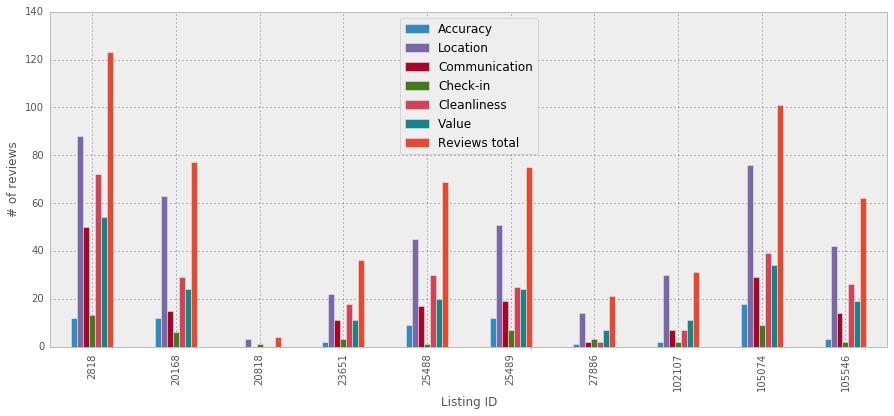

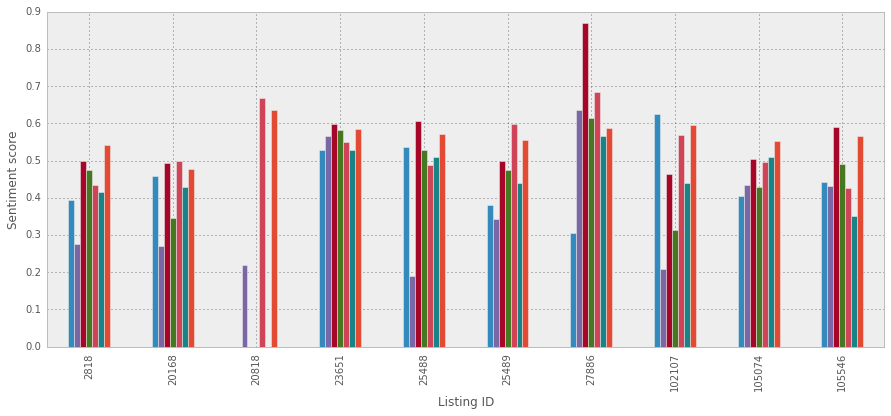

In [22]:
# -------------------------------------------------------------------------------------
# ALL FEATURES MENTIONED IN REVIEW LEVEL PER LISTING
# -------------------------------------------------------------------------------------

a1=pipe[pipe['Feature: Accuracy']!=0].groupby('Review ID').mean()
b1=a1.groupby('Listing ID')
r1=b1['Feature: Accuracy'].count().rename("Accuracy")

a2=pipe[pipe['Feature: Location']!=0].groupby('Review ID').mean()
b2=a2.groupby('Listing ID')
r2=b2['Feature: Location'].count().rename("Location")

a3=pipe[pipe['Feature: Communication']!=0].groupby('Review ID').mean()
b3=a3.groupby('Listing ID')
r3=b3['Feature: Communication'].count().rename("Communication")

a4=pipe[pipe['Feature: Check-in']!=0].groupby('Review ID').mean()
b4=a4.groupby('Listing ID')
r4=b4['Feature: Check-in'].count().rename("Check-in")

a5=pipe[pipe['Feature: Cleanliness']!=0].groupby('Review ID').mean()
b5=a5.groupby('Listing ID')
r5=b5['Feature: Cleanliness'].count().rename("Cleanliness")

a6=pipe[pipe['Feature: Value']!=0].groupby('Review ID').mean()
b6=a6.groupby('Listing ID')
r6=b6['Feature: Value'].count().rename("Value")

bbb=pipe.groupby('Review ID').mean()
ab=bbb.groupby('Listing ID')
revtot=ab['Feature: Accuracy'].count().rename("Reviews total")
d=pd.concat([r1,r2,r3,r4,r5,r6,revtot],axis=1)[:10].plot(kind='bar',
                                              figsize=(15,6))
d.set_ylabel("# of reviews")

sent = pipe[pipe['Sentiment score']!=0].copy()[['Listing ID','Sentiment score']]
sentiment=sent.groupby('Listing ID').mean()
e=pd.concat([result,sentiment],axis=1)[:10].plot(kind='bar'
                ,figsize=(15,6),legend=False)
e.set_ylabel("Sentiment score")
